In [1]:
import sqlalchemy
from sqlalchemy import create_engine, inspect, text
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
SQL_USERNAME = "postgres"
SQL_PASSWORD = "postgres"
SQL_IP = "localhost"
PORT = "5432"
DATABASE = "crowdfunding_db"

In [4]:
# create engine
connection_string = f"postgresql+psycopg2://{SQL_USERNAME}:{SQL_PASSWORD}@{SQL_IP}:{PORT}/{DATABASE}"
        
        
engine = create_engine(connection_string)

In [15]:
query = """
        SELECT 
            AVG(pledged)::NUMERIC(10,2) as avg_pledged,
            country
        FROM 
            campaign
        group by country
        order by avg_pledged DESC;
        """
df = pd.read_sql(text(query), con=engine)
df.head()

,avg_pledged,country
0,63927.00,CA
1,49175.37,AU
2,45795.88,IT
3,45681.35,GB
4,41165.58,US


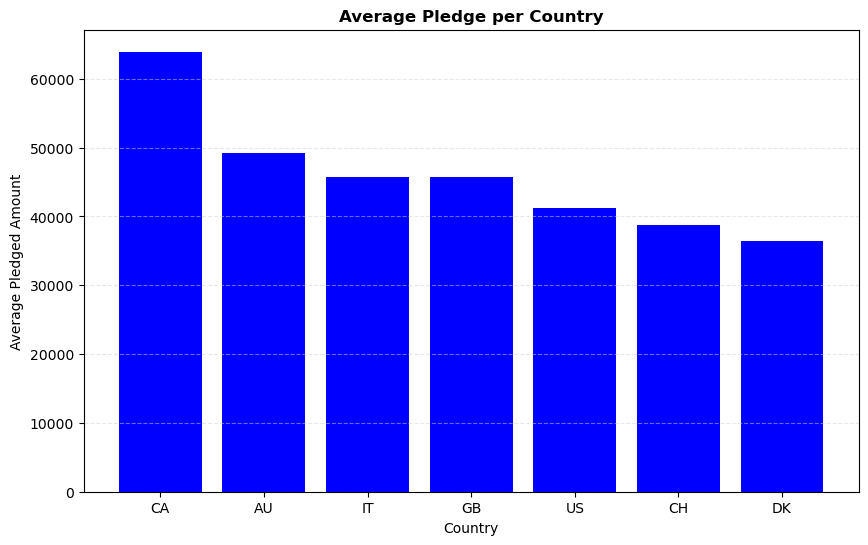

In [17]:
# visualize that dataframe and add it to the report

plt.figure(figsize=(10,6))
plt.bar(df.country, df.avg_pledged, color="blue")
plt.title("Average Pledge per Country", fontweight="bold")
plt.xlabel("Country")
plt.ylabel("Average Pledged Amount")
plt.grid(axis="y", color="lightgrey", linestyle = "--", alpha=0.5)

plt.show()